In [1]:
import tensorflow as tf
from tensorflow keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical 
#to_categorical Converts a class vector (integers) to binary class matrix.
import numpy as np #🥝
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape  #zbiór train ilość zdjec, rozmiar, rozmiar, 
#zbiór test pododnie, dane w formacie 3 wymiarowym, siec potrzebuje 4 wymiary

170500096/170498071 [==============================] - 16s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

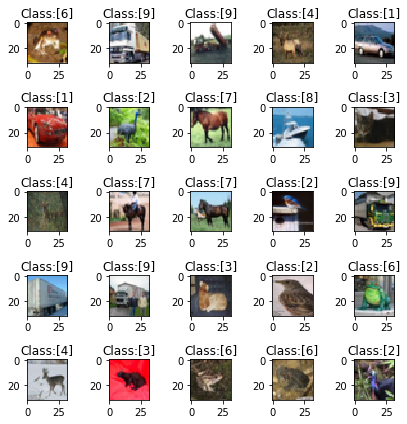

In [0]:
#cała komorka dot. tylko wyswietlenia danych do sprawdzenia datasetu
plt.figure(figsize=(6,6))
for idx in range (25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx])#,cmap='gray'
    plt.title('Class:{}'.format(y_train[idx]))
    plt.tight_layout()

In [3]:
#siec potrzebuje 4 wymiarów, te co są + ilość kolorów w tym przypadku 1,
#oraz znomalizowanych danych, mozna podzielić ilość kolorów na 255
num_channels = 3 #rgb❤💚💙
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(-1,img_rows,img_cols,num_channels)# 1 na koncu to kanal kolorów
X_test = X_test.reshape(-1,img_rows,img_cols,num_channels)#-1 zamiast 60k, policzy sam
input_shape = (img_rows,img_cols,num_channels)
X_train.shape, X_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
#normalizacja
# poczielic przez 255 bo to max wartosc
if np.max(X_train) > 1: X_train =  X_train/255
if np.max(X_test) > 1: X_test =  X_test/255

In [0]:
#y_train = y_train.reshape(-1).shape #trzeba zrobić reshape zeby stary kod zadziałał bo dane wjesciowe sa inne

In [0]:
# tak wyglada tablica prawdopodobienstwa 
#5=tablica z klasami gdzie wszysktie klasy  = 0 a tylko jedna(5) = 1 
#5=>[0,0,0,0,0,5,0,0,0,0]   0..9
#0=>[1,0,0,0,0,0,0,0,0,0]

if len(y_train.shape) == 2: 
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)
    
    
if len(y_train.shape) == 1: 
    num_classes = len(set(y_train)) 
    y_train = to_categorical (y_train, num_classes)
    y_test = to_categorical (y_test, num_classes)    
    

In [7]:
model = Sequential ([
    
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape), 
    Conv2D(filters=32, kernel_size=(3,3),activation='relu'), 
    MaxPool2D(pool_size=(2,2)), 
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(), #most miedzy kopiowanymi warstwami
    
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax') 
   
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [8]:
#trenowanie
model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=10,  #zmiana z 2
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 298us/step - loss: 1.9184 - acc: 0.2699 - val_loss: 1.6190 - val_acc: 0.4036
Epoch 2/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.5213 - acc: 0.4364 - val_loss: 1.3571 - val_acc: 0.5083
Epoch 3/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.3428 - acc: 0.5149 - val_loss: 1.2979 - val_acc: 0.5383
Epoch 4/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.2294 - acc: 0.5595 - val_loss: 1.1260 - val_acc: 0.6002
Epoch 5/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.1478 - acc: 0.5915 - val_loss: 1.0298 - val_acc: 0.6365
Epoch 6/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.0820 - acc: 0.6165 - val_loss: 1.0819 - val_acc: 0.6205
Epoch 7/10
50000/50000 [==============================] - 9s 175us/step -

In [9]:
#testowanie
score=model.evaluate(X_test,y_test,verbose=0)
score # zwraca loss i accuracy

[0.8684579533576965, 0.6911]